[[3.93737735e+08]]


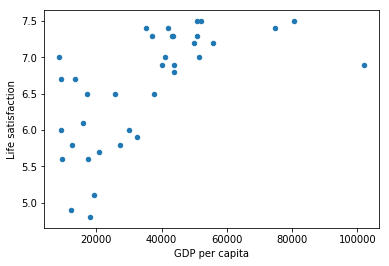

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


def prepare_country_stats(oecd_bli, gdp_per_capita):
    #get the pandas dataframe of GDP per capita and Life satisfaction
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    return full_country_stats[["GDP per capita", 'Life satisfaction']]

# Load Data set
oecd = pd.read_csv("D:/Programming/Dataset/oecd_bli_2015.csv", thousands=',')
gdp = pd.read_csv("D:/Programming/Dataset/gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', 
                  na_values="n/a")
gdp.head(5)

# Prepare data
country_stats = prepare_country_stats(oecd, gdp)
y = np.c_[country_stats["GDP per capita"]]
x = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.plot()

model = LinearRegression()

model.fit(x,y)
x_new = [[22587]]
print(model.predict(x_new))